---
Linear & Polynomial Regression
---



## Case

We are going to help a company to optimize their advertisement strategy. They spend money on advertisement for different media channels: TV, radio and newspaper - and wants to know which channel is the most most effective.

**Task:**

- suggest marketing plan to increase sales units
- use linear regression to predict sales based on different spendings on different marketing channels

---


### Initial EDA - Exploratory Data Analysis

The dataset for this lecture comes from ISLR - Introduction to Statistical Learning. The dataset used is [Advertising.csv](https://www.kaggle.com/ishaanv/ISLR-Auto)

Units:

- TV, radio, newspaper - thousands dollars
- Sales - thousands units


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("../data/advertising.csv", index_col=0)

In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [3]:
df.head()


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


**Insights via plots**

 Let's do some scatterplots, one for each feature vs the target.

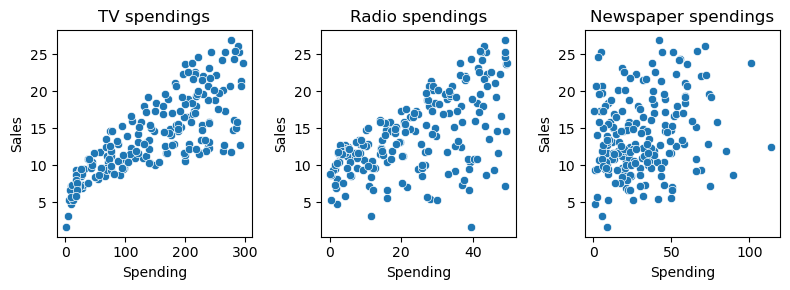

In [4]:
number_features = df.shape[1] - 1

fig, ax = plt.subplots(1, number_features, figsize=(8, 3), dpi=100)

for i, feature in enumerate(df.columns[:-1]):
    sns.scatterplot(data=df, x=feature, y="Sales", ax=ax[i])
    ax[i].set(xlabel="Spending", title=f"{feature} spendings")

fig.tight_layout()


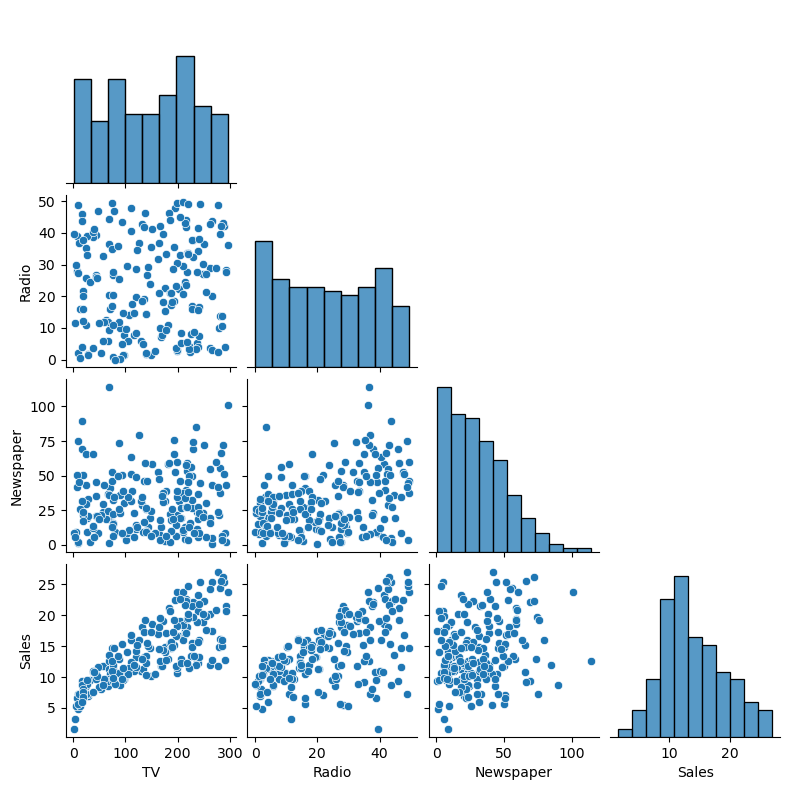

In [5]:
# plot pairwise relationships in a df
ax = sns.pairplot(df, corner=True, height=2)

# set corner to True as upper right mirrors the corner, this saves computations


---

## Linear regression

Linear regression is a supervised learning algorithm, the predicted output is continuous. 

When we have one feature (also called predictor) variable it's called simple linear regression. A linear regression model with one feature variable looks like this:

$f_{w,b}(x) = w \cdot x + b$

The output of this model for any given x, is called the prediction of the model for that x. 

We done the output of the model $\hat{y}$. In other words, we have

$\hat{y}^{i} = w \cdot x^{i} + b$,

where $x$ is the predictor (feature) variable, $\hat{y}$ is the prediction, $w$ is the slope and $b$ the intercept of our model. 

The parameters of our model are unknown and needs to be estimated using our training data points $(x^1, y^1), (x^2, y^2), \ldots, (x^m,y^m)$.


**Example**

Let's try to predict sales numbers using only one feature. Let's choose TV spending as the feature, since that seems to have a better linear relationship with the target (sales numbers) than the other features. We draw this conclusion using visual inspection of our scatterplots.

In [6]:
x_train, y_train = df["TV"], df["Sales"]

# fits a polynomial of degree deg using least squares polynomial fit.

w, b = np.polyfit(x_train, y_train, deg=1)  # returns coefficient with highest power first

In [7]:
print('Estimated model parameters, based on our training data')
print(f'w : {w}')
print(f'b : {b}')

Estimated model parameters, based on our training data
w : 0.04753664043301973
b : 7.0325935491276965


In [8]:
# let's define our linear model

def linear_model(x, w, b):

    y_hat = w*x + b
    
    return y_hat

In [9]:
# beräkna nu ut våra predictions, för varje punkt i vår dataset

y_hats = [linear_model(x, w, b) for x in x_train]

[Text(0.5, 1.0, 'TV advertisement linear regression'),
 Text(0.5, 0, 'Thousands dollars'),
 Text(0, 0.5, 'Sales thousands units')]

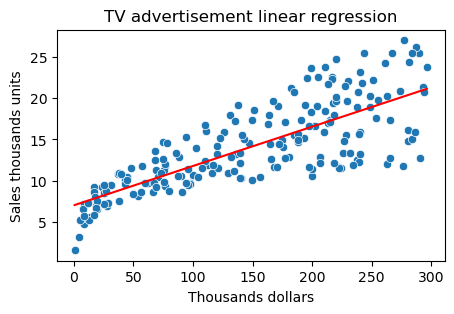

In [10]:
fig, ax = plt.figure(figsize=(5, 3), dpi=100), plt.axes()

sns.scatterplot(data=df, x="TV", y="Sales")
sns.lineplot(x=x_train, y=y_hats, color="red")

ax.set(
    title="TV advertisement linear regression",
    xlabel="Thousands dollars",
    ylabel="Sales thousands units",
)


We can also use regplot to simultaneously do a scatter plot, and a plot of the 'best' fitting line on this data. 

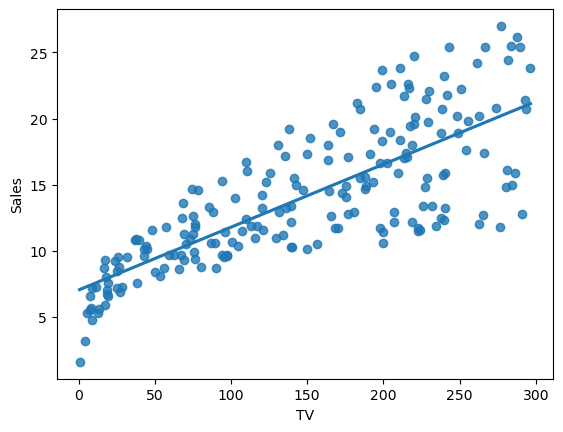

In [11]:
# regression line using seaborn regplot

sns.regplot(x=x_train, y=y_train, order=1, ci=None);


---

## Polynomial regression

Let's now try polynomial regression instead. This is just another another regression algorithm which might be better suited to some data than a linear regression model.  

Let's assume we want to fit a polynomial of degree two. If we also have one feature, the polyonomial regression model of degree two then  looks like this:

$f_{\bold{w},b}(x) = w_2 \cdot x^2 + w_1 \cdot x + b$.

The prediction, for training simple $i$ is thus denoted

$\hat{y}^{i} = w_2 \cdot (x^{{i}})^2 + w_1 \cdot x^{i} + b$,

In [12]:
w2, w1, b = np.polyfit(x_train, y_train, deg=2)  # returns coefficient with highest power first

print('Estimated model parameters, based on our training data')
print(f'w2 : {w2}')
print(f'w1 : {w1}')
print(f'b  : {b}')

Estimated model parameters, based on our training data
w2 : -6.846933732939053e-05
w1 : 0.0672659269562448
b  : 6.114120128333095


In [13]:
# let's now define our polynomial model (of degree two)

def polynomial_model(x, w2, w1, b):

    y_hat = w2*x**2 + w1*x + b
    
    return y_hat

In [14]:
# beräkna våra predicted y-values

y_hats = [polynomial_model(x, w2, w1, b) for x in x_train]

[Text(0.5, 1.0, 'TV advertisement linear regression'),
 Text(0.5, 0, 'Thousands dollars'),
 Text(0, 0.5, 'Sales thousands units')]

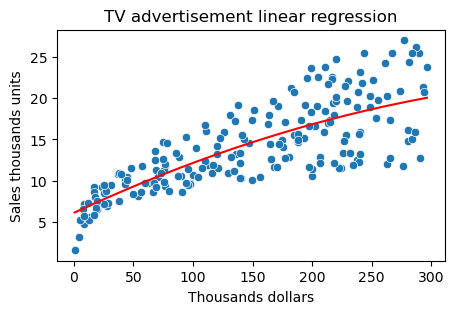

In [15]:
# compare the resulting predictions with the ground truth

fig, ax = plt.figure(figsize=(5, 3), dpi=100), plt.axes()

sns.scatterplot(data=df, x="TV", y="Sales")
sns.lineplot(x=x_train, y=y_hats, color="red")

ax.set(
    title="TV advertisement linear regression",
    xlabel="Thousands dollars",
    ylabel="Sales thousands units",
)

It indeed, atleast looks, as if this is a better fitting model to our data! 

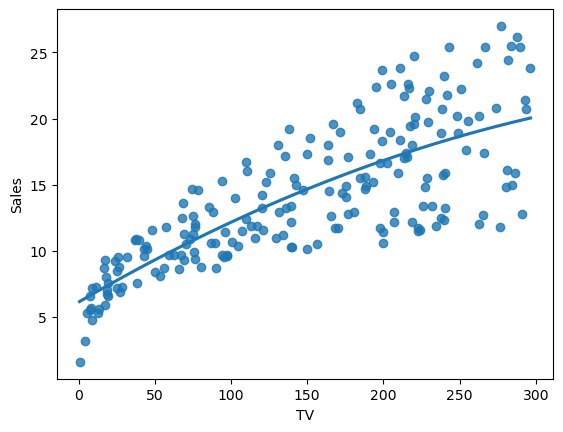

In [16]:
# Again, we could use regplot to instantly plot our data, and a fitted polynomial of desired order

sns.regplot(x=x_train, y=y_train, order=2, ci=None); 

---
# Challenges

**Task 1**

Try creating polynomial regression of higher orders and fit them on our data. Then, plot the results as we've done above.

Which order of polynomial seem to fit our data best? Try polynomials of orders 3, 4 & 5.

Try to solve this task without using regplot.

**Task 2**

What happens if you fit a polynomial of order 20, 50 or 100?

What are your thoughts on the results?

Tip: use regplot for this. 

**Task 3**

Evaluating the models - how well did we predict $\bf{y}$ with $\hat{\bf{y}}$?

To answer this question we use several **evaluation metrics** or **loss functions**: 

- Mean Absolute Error (MAE) - mean of error between $\bf{y}$ and ${\hat{\bf{y}}}$. The unit is same as measured quantity.

$$MAE = \frac{1}{m}\sum_{i=1}^m |y^i - \hat{y}^i|$$

- Mean Squared Error (MSE) - mean of squared errors between $\bf{y}$ and ${\hat{\bf{y}}}$. It punishes large errors, and the units are in square units of the measured quantity

$$MSE = \frac{1}{m}\sum_{i=1}^m (y^i - \hat{y}^i)^2$$

- Root Mean Squared Error (RMSE) - square root of MSE between $\bf{y}$ and ${\hat{\bf{y}}}$. It punishes large errors, and the units are same as measured quantity, hence easier to interpret.

$$RMSE = \sqrt{\frac{1}{m}\sum_{i=1}^m (y^i - \hat{y}^i)^2}$$


**For each of these metrics:** 

- Implement a function that, given two lists (of predicted $\hat{y}$ and true $y$) calculates them and returns a single number.
- Then, calculate each metric for the predictions of our linear model and polynomial models of degree 2 and 5. Present the results.
- Which model fits the data best according to these metrics?


In [17]:
# Task 1

def polyreg(x: float, coeffs: list[float]) -> float:
    '''
    f(x) = w_0 + w_1*x + w_2*x^2 + ... + w_n*x^n
    '''
    y_hat = sum([c*x**i for i, c in enumerate(coeffs)])
    return y_hat

In [37]:
# Task 3

def mae(x: list[float], y: list[float], degree: int) -> float:
    coeffs = np.polyfit(x, y, degree)[::-1]
    mae_sum = sum(abs(y_i - polyreg(x_i, coeffs)) for y_i, x_i in zip(y, x))
    return mae_sum/len(x)

def mse(x: list[float], y: list[float], degree: int) -> float:
    coeffs = np.polyfit(x, y, degree)[::-1]
    mae_sum = sum((y_i - polyreg(x_i, coeffs))**2 for y_i, x_i in zip(y, x))
    return mae_sum/len(x)

def rmse(x: list[float], y: list[float], degree: int) -> float:
    return np.sqrt(mse(x, y, degree))

C:\Users\isak-\AppData\Local\Temp\ipykernel_26604\2103526734.py:8: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x_train, y_train, deg)[::-1]
C:\Users\isak-\AppData\Local\Temp\ipykernel_26604\2723678847.py:4: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, degree)[::-1]
C:\Users\isak-\AppData\Local\Temp\ipykernel_26604\2723678847.py:9: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, degree)[::-1]
C:\Users\isak-\AppData\Local\Temp\ipykernel_26604\2723678847.py:9: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, degree)[::-1]
C:\Users\isak-\AppData\Local\Temp\ipykernel_26604\2103526734.py:8: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x_train, y_train, deg)[::-1]
C:\Users\isak-\AppData\Local\Temp\ipykernel_26604\2723678847.py:4: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, degree)[::-1]
C:\Users\isak-\AppData\Local\Temp\ipykernel_26

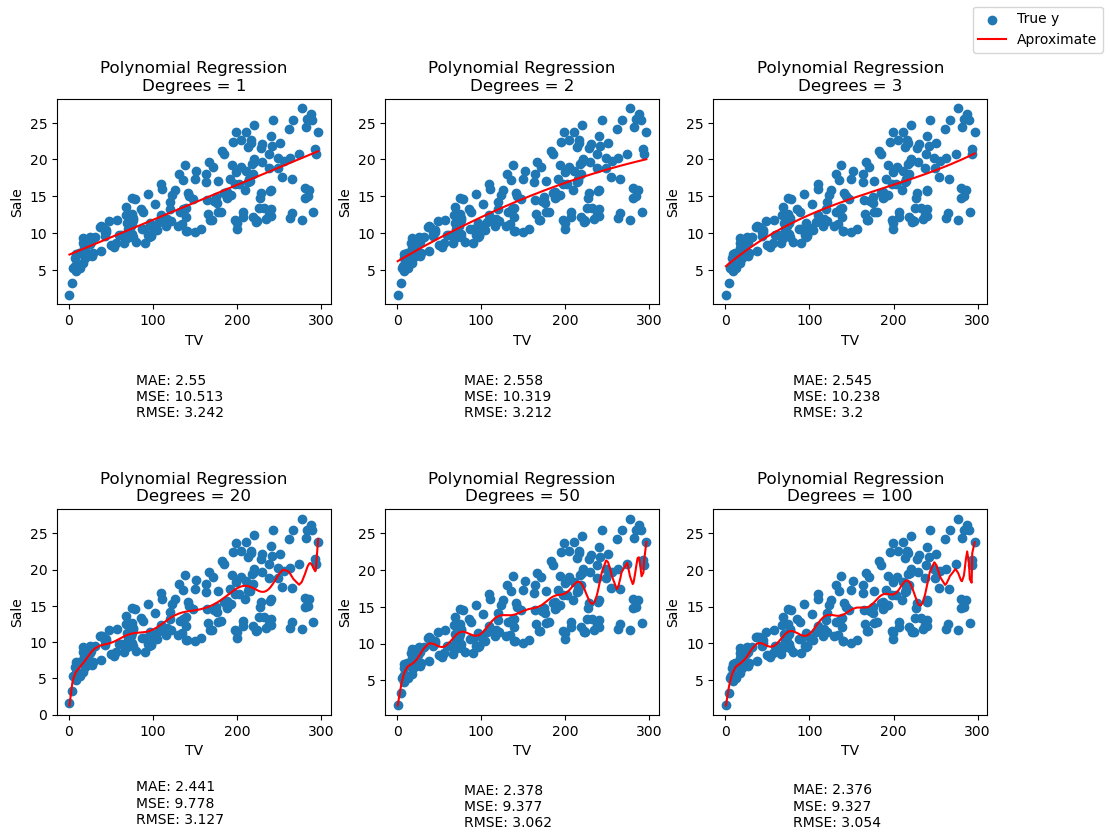

In [41]:
# Task 1 & 2

degrees = [1, 2, 3, 20, 50, 100]
fig, axs = plt.subplots(len(degrees)//3, 3, figsize=(12, 4*len(degrees)//3), dpi=100,\
                        squeeze=False, gridspec_kw={"wspace": 0.2, "hspace": 1})

for ax, deg in zip(axs.flat, degrees):
    coeffs = np.polyfit(x_train, y_train, deg)[::-1]
    x_train_sorted = sorted(x_train)
    y_hats = [polyreg(x, coeffs) for x in x_train_sorted]
    ax.scatter(x_train, y_train)
    ax.plot(x_train_sorted, y_hats, c="red")
    ax.set(xlabel="TV", ylabel="Sale", title=f"Polynomial Regression\nDegrees = {deg}")
    # Task 3
    ax.text(80, -15, f"MAE: {round(mae(x_train, y_train, deg), 3)}\n"\
                     f"MSE: {round(mse(x_train, y_train, deg), 3)}\n"\
                     f"RMSE: {round(rmse(x_train, y_train, deg), 3)}")
fig.legend(["True y", "Aproximate"])

plt.show()